# Unemployment
----

#### Note
* Australian Federal unemployment analysis due to Covid-19

* Completed by Ishaan Nigam

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from pprint import pprint
from scipy import stats
from scipy.stats import linregress
import matplotlib.ticker as ticker

from citipy import citipy
from datetime import date
import scipy.stats as st


In [3]:
#import cities datafile 
unemployment_data = pd.read_csv("Data/Unemployment/Unemployment.csv")

unemployment_data.head()


,Date,Total Unemployment Population,Population Actively Looking For Work,Australian Unemployment Rate,Male Unemployment Rate,Female Unemployment Rate,Youth Unemployment Rate,Monthly cases
0,Jan-17,777.65,562.12,6.14,6.03,6.27,12.3,0
1,Feb-17,820.27,566.99,6.35,6.13,6.59,12.9,0
2,Mar-17,803.38,544.88,6.22,5.94,6.53,13.0,0
3,Apr-17,730.72,509.02,5.66,5.28,6.09,12.6,0
4,May-17,704.48,483.57,5.44,5.32,5.57,12.6,0


In [4]:
#convert raw data into a dataframe 
unemployment_data_df = pd.DataFrame(unemployment_data)
unemployment_data_df.head()

,Date,Total Unemployment Population,Population Actively Looking For Work,Australian Unemployment Rate,Male Unemployment Rate,Female Unemployment Rate,Youth Unemployment Rate,Monthly cases
0,Jan-17,777.65,562.12,6.14,6.03,6.27,12.3,0
1,Feb-17,820.27,566.99,6.35,6.13,6.59,12.9,0
2,Mar-17,803.38,544.88,6.22,5.94,6.53,13.0,0
3,Apr-17,730.72,509.02,5.66,5.28,6.09,12.6,0
4,May-17,704.48,483.57,5.44,5.32,5.57,12.6,0


In [5]:
#print number of periods in this analysis and comment if data is sufficient
total_periods = len(unemployment_data_df)

print(f"There are a total of {total_periods} in this data set. Anything over 30 periods is conclusive for Covid-19 Analysis")

There are a total of 55 in this data set. Anything over 30 periods is conclusive for Covid-19 Analysis



## Summary Analysis - total unemployment

In [6]:
#Run a summary analysis on total unemployment
unemployment_data_df["Total Unemployment Population"]=unemployment_data_df["Total Unemployment Population"].astype(float)


unemployment_data_df["Total Unemployment Population"].describe()


count     55.000000
mean     753.677636
std       92.976285
min      632.440000
25%      691.875000
50%      716.930000
75%      804.525000
max      994.390000
Name: Total Unemployment Population, dtype: float64

In [7]:
#store enemployment total - person values into a list
unemployed_persons = unemployment_data_df["Total Unemployment Population"]
unemployed_persons.head()

0    777.65
1    820.27
2    803.38
3    730.72
4    704.48
Name: Total Unemployment Population, dtype: float64

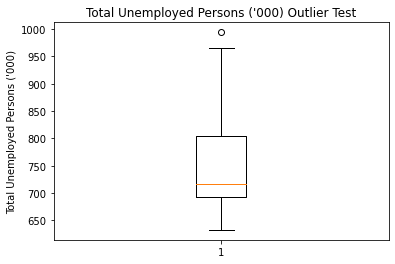

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title("Total Unemployed Persons ('000) Outlier Test")
ax1.set_ylabel("Total Unemployed Persons ('000)")
ax1.boxplot(unemployed_persons)
plt.savefig("Analysis/Unemployment/Unemployment_boxplot.png")
plt.show()

In [11]:
quartiles = unemployed_persons.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Total Unemployed Persons is: {lowerq}")
print(f"The upper quartile of Total Unemployed Persons is: {upperq}")
print(f"The interquartile range of Total Unemployed Persons: {iqr}")
print(f"The the median of Total Unemployed: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print (f"Therefore, the reported total unemployed persons reported in Jul 2020 (994.39) is deemed as an outlier")

The lower quartile of Total Unemployed Persons is: 691.875
The upper quartile of Total Unemployed Persons is: 804.525
The interquartile range of Total Unemployed Persons: 112.64999999999998
The the median of Total Unemployed: 716.93 
Values below 522.9000000000001 could be outliers.
Values above 973.5 could be outliers.
Therefore, the reported total unemployed persons reported in Jul 2020 (994.39) is deemed as an outlier



## Line graph to show the trend of unemployment rate by gender

<function matplotlib.pyplot.show(close=None, block=None)>

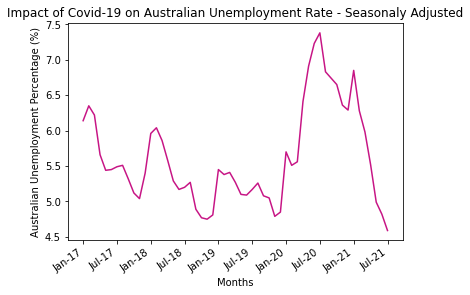

<Figure size 1440x720 with 0 Axes>

In [12]:
#plot a line graph to show Australian unemployment rate 

x_periods = unemployment_data_df["Date"]
australian_unemployment = unemployment_data_df["Australian Unemployment Rate"]

plt.savefig("Analysis/Unemployment/Unemployment_rate_linegraph.png")
male_plot = plt.plot(x_periods, australian_unemployment, color="mediumvioletred", label="Australian Unemployment Rate (%)")

plt.title("Impact of Covid-19 on Australian Unemployment Rate - Seasonaly Adjusted")
plt.xlabel("Months")
plt.ylabel("Australian Unemployment Percentage (%)")
plt.xticks(x_periods[0::6],rotation=35, horizontalalignment="right")
plt.figure(figsize=(20,10))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

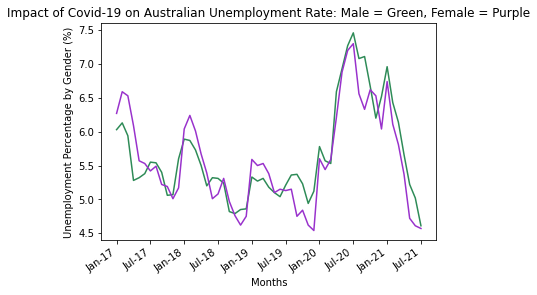

<Figure size 1440x720 with 0 Axes>

In [13]:
#plotting a line graph

x_periods = unemployment_data_df["Date"]
male_unemployment = unemployment_data_df["Male Unemployment Rate"]
female_unemployment = unemployment_data_df["Female Unemployment Rate"]

male_plot = plt.plot(x_periods, male_unemployment, color="seagreen", label="Male Unemployment (%)")
female_plot = plt.plot(x_periods, female_unemployment, color="darkorchid", label="Female Unemployment (%)")

plt.title("Impact of Covid-19 on Australian Unemployment Rate: Male = Green, Female = Purple")
plt.xlabel("Months")
plt.ylabel("Unemployment Percentage by Gender (%)")
plt.xticks(x_periods[0::6],rotation=35, horizontalalignment="right")
plt.figure(figsize=(20,10))
plt.savefig("Analysis/Unemployment/Unemployment_rate_by_gender.png")

plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

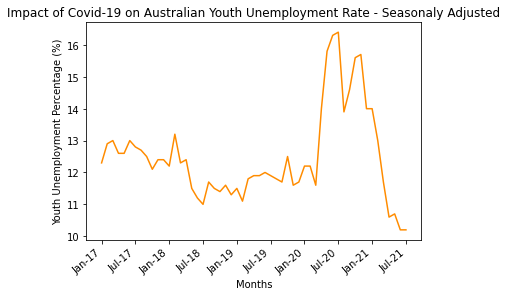

<Figure size 1440x720 with 0 Axes>

In [14]:
#plotting a line graph

x_periods = unemployment_data_df["Date"]

youth_unemployment = unemployment_data_df["Youth Unemployment Rate"]
youth_plot = plt.plot(x_periods, youth_unemployment, color="darkorange", label="Youth Unemployment (%) - between 15-24 years old")

plt.title("Impact of Covid-19 on Australian Youth Unemployment Rate - Seasonaly Adjusted")
plt.xlabel("Months")
plt.ylabel("Youth Unemployment Percentage (%)")
plt.xticks(x_periods[0::6],rotation=40, horizontalalignment="right")
plt.figure(figsize=(20,10))
plt.savefig("Analysis/Unemployment/Unemployment_youth_line.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

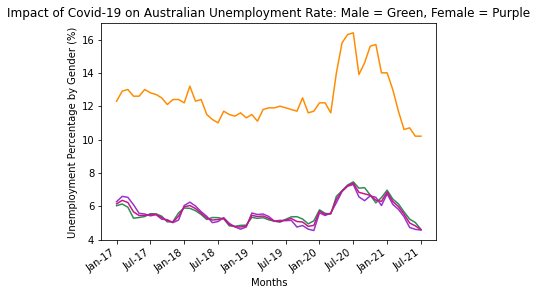

<Figure size 1440x720 with 0 Axes>

In [15]:
#plotting a line graph

x_periods = unemployment_data_df["Date"]
male_unemployment = unemployment_data_df["Male Unemployment Rate"]
female_unemployment = unemployment_data_df["Female Unemployment Rate"]

male_plot = plt.plot(x_periods, male_unemployment, color="seagreen", label="Male Unemployment (%)")
female_plot = plt.plot(x_periods, female_unemployment, color="darkorchid", label="Female Unemployment (%)")
youth_plot = plt.plot(x_periods, youth_unemployment, color="darkorange", label="Youth Unemployment (%) - between 15-24 years old")
male_plot = plt.plot(x_periods, australian_unemployment, color="mediumvioletred", label="Australian Unemployment Rate (%)")

plt.title("Impact of Covid-19 on Australian Unemployment Rate: Male = Green, Female = Purple")
plt.xlabel("Months")
plt.ylabel("Unemployment Percentage by Gender (%)")
plt.xticks(x_periods[0::6],rotation=35, horizontalalignment="right")
plt.figure(figsize=(20,10))
plt.savefig("Analysis/Unemployment/Unemployment_rate_by_gender.png")
plt.show


## Unemployment split by gender before Covid-19 (Nov-2019)

In [16]:
#identify the unemployment rate as at Nov-2019 for males
male_precovid = unemployment_data_df.loc[unemployment_data_df["Date"]=="Nov-19","Male Unemployment Rate"]
male_precovid



34    4.94
Name: Male Unemployment Rate, dtype: float64

In [17]:
#identify the unemployment rate as at Nov-2019 for females
female_precovid = unemployment_data_df.loc[unemployment_data_df["Date"]=="Nov-19","Female Unemployment Rate"]
female_precovid

34    4.62
Name: Female Unemployment Rate, dtype: float64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

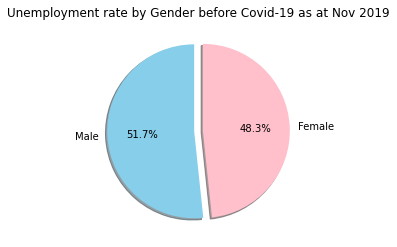

In [18]:
#format the pie chat
rate = [4.94,4.62]
pie = ["Male","Female"]
colors = ["skyblue","pink"]
explode = (0.05,0.05)

plt.pie(rate, labels = pie, explode = explode, colors = colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Unemployment rate by Gender before Covid-19 as at Nov 2019")
plt.savefig("Analysis/Unemployment/pre_covid_gender_pie.png")
plt.plot


## Unemployment split by gender during Covid-19 peak (July-2019)

As per Health.gov, Australia reported the highest peak of Covid-19 in July 2020.

https://www.health.gov.au/news/health-alerts/novel-coronavirus-2019-ncov-health-alert/coronavirus-covid-19-case-numbers-and-statistics

In [19]:
#identify the unemployment rate as at Nov-2019 for males
male_covid = unemployment_data_df.loc[unemployment_data_df["Date"]=="Jul-20","Male Unemployment Rate"]
male_covid



42    7.46
Name: Male Unemployment Rate, dtype: float64

In [20]:
#identify the unemployment rate as at Nov-2019 for females
female_covid = unemployment_data_df.loc[unemployment_data_df["Date"]=="Jul-20","Female Unemployment Rate"]
female_covid

42    7.3
Name: Female Unemployment Rate, dtype: float64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

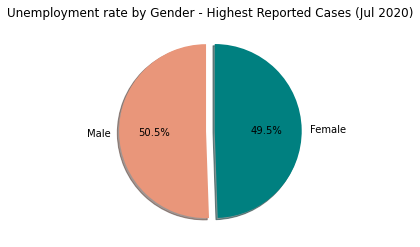

In [21]:
#format the pie chat
rate = [7.46,7.3]
pie = ["Male","Female"]
colors = ["darksalmon","teal"]
explode = (0.05,0.05)

plt.pie(rate, labels = pie, explode = explode, colors = colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Unemployment rate by Gender - Highest Reported Cases (Jul 2020)")
plt.savefig("Analysis/Unemployment/covid_gender_pie.png")
plt.plot


## Hypothesis 1

### Covid-19 did not have any significant impact on unemployment rate in Australia. 
*compare covid-19 montly cases with unemployment rate using statistics



The Correlation Coefficient of Covid-19 Cases vs Unemployment Rate is 0.42
The Correlation Coefficient of 0.42 suggests a moderate-positive relationship between Covid-19 cases and Australian Unemployment Rate


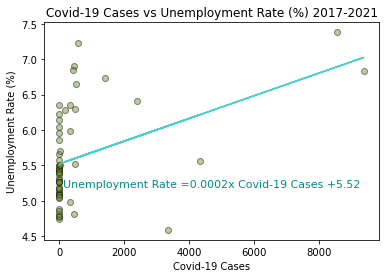

In [22]:
#x_axis 
x_axis = pd.to_numeric(unemployment_data_df["Monthly cases"]).astype(float)

#y_axis
y_axis = pd.to_numeric(unemployment_data_df["Australian Unemployment Rate"]).astype(float)


#regression analysis
slope,intercept, r_value, p_value, std_err = st.linregress(x_axis,y_axis)
line_of_best_fit = slope * x_axis + intercept
regression_equation = "Unemployment Rate =" + str(round(slope,4)) + "x Covid-19 Cases +" + str(round(intercept,2))

#plot

plt.scatter(x_axis, y_axis, alpha=.45, marker ="o", facecolor="olivedrab", edgecolors="black")
plt.plot(x_axis,line_of_best_fit,"r-",color="mediumturquoise")

#format the scatter plot
plt.title(f"Covid-19 Cases vs Unemployment Rate (%) 2017-2021")
plt.xlabel("Covid-19 Cases")
plt.ylabel("Unemployment Rate (%)") 
plt.annotate(regression_equation,(100,5.2),fontsize = 11, color = "darkcyan")
print(f"The Correlation Coefficient of Covid-19 Cases vs Unemployment Rate is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print (f"The Correlation Coefficient of 0.42 suggests a moderate-positive relationship between Covid-19 cases and Australian Unemployment Rate")
plt.savefig("Analysis/Unemployment/correlation_full_periods.png")
plt.show()

### Correlation between Covid-19 cases and unemployment rate from Jan 2020-Aug 2020. 
*compare covid-19 montly cases with unemployment rate using statistics



In [23]:
covid_unemployment_df = unemployment_data_df[unemployment_data_df["Monthly cases"]!=0]
covid_unemployment_df.head()

,Date,Total Unemployment Population,Population Actively Looking For Work,Australian Unemployment Rate,Male Unemployment Rate,Female Unemployment Rate,Youth Unemployment Rate,Monthly cases
36,Jan-20,775.04,552.71,5.70,5.78,5.60,12.2,9
37,Feb-20,761.05,511.93,5.51,5.57,5.44,12.2,16
38,Mar-20,765.47,532.26,5.56,5.53,5.59,11.6,4334
39,Apr-20,850.35,639.53,6.41,6.59,6.21,14.0,2387
40,May-20,904.56,678.40,6.91,6.93,6.88,15.8,439


The Correlation Coefficient of Covid-19 Cases vs Unemployment Rate is 0.28
The Correlation Coefficient of 0.28 suggests a weak-positive relationship between Covid-19 cases and Australian Unemployment Rate


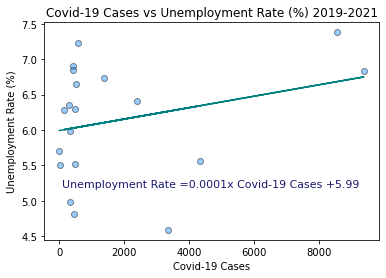

In [25]:
#x_axis 
x_axis = pd.to_numeric(covid_unemployment_df["Monthly cases"]).astype(float)

#y_axis
y_axis = pd.to_numeric(covid_unemployment_df["Australian Unemployment Rate"]).astype(float)


#regression analysis
slope,intercept, r_value, p_value, std_err = st.linregress(x_axis,y_axis)
line_of_best_fit = slope * x_axis + intercept
regression_equation = "Unemployment Rate =" + str(round(slope,4)) + "x Covid-19 Cases +" + str(round(intercept,2))

#plot

plt.scatter(x_axis, y_axis, alpha=.45, marker ="o", facecolor="dodgerblue", edgecolors="black")
plt.plot(x_axis,line_of_best_fit,"r-",color="teal")

#format the scatter plot
plt.title(f"Covid-19 Cases vs Unemployment Rate (%) 2019-2021")
plt.xlabel("Covid-19 Cases")
plt.ylabel("Unemployment Rate (%)") 

plt.annotate(regression_equation,(100,5.2),fontsize = 11, color = "midnightblue")
print(f"The Correlation Coefficient of Covid-19 Cases vs Unemployment Rate is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print (f"The Correlation Coefficient of 0.28 suggests a weak-positive relationship between Covid-19 cases and Australian Unemployment Rate")
plt.savefig("Analysis/Unemployment/correlation_covid_periods.png")
plt.show()